# project:No-show appointments

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Wrangling

In [4]:
#read file 'KaggleV2-May-2016.csv' :
df=pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.shape

(110527, 14)

In [6]:
#information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#statistics information
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## clean data

In [8]:
#columns have nan values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [9]:
#chick for duplicated rows
sum(df.duplicated())

0

In [10]:
#Handicap column has five different values(0,1,2,3,4) so I converted (1,2,3,4) to 1 that means handicap and 0 not handicapped
def replace_value(num):
    if num>0 :
        return 1
    else:
        return 0
df['Handcap']=df['Handcap'].apply(lambda x:replace_value(x))

In [11]:
#delet patiend less than 0
df.drop(df[df['Age']<=0].index,axis=0,inplace=True)

In [12]:
#incorrect date
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay']).dt.date

In [13]:
# checking that scheduled day is before appointment day
check = df[df['ScheduledDay'] > df['AppointmentDay']][['ScheduledDay','AppointmentDay']]
check

,ScheduledDay,AppointmentDay
27033,2016-05-10,2016-05-09
55226,2016-05-18,2016-05-17
64175,2016-05-05,2016-05-04
71533,2016-05-11,2016-05-05
72362,2016-05-04,2016-05-03


In [12]:
#drop uncurrect rows
check.drop(check.index,axis=0,inplace=True)

In [13]:
#delet columns do not use it 
df.drop(['AppointmentID','Scholarship'],axis=1,inplace=True)

In [14]:
#creat column day of appointment
df.insert(4,'DayOfAppointment',pd.to_datetime(df['AppointmentDay']).dt.day_name())

In [15]:
df.shape

(106987, 13)

In [16]:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,DayOfAppointment,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29,2016-04-29,Friday,62,JARDIM DA PENHA,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29,2016-04-29,Friday,56,JARDIM DA PENHA,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29,2016-04-29,Friday,62,MATA DA PRAIA,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29,2016-04-29,Friday,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29,2016-04-29,Friday,56,JARDIM DA PENHA,1,1,0,0,0,No


# Exploring Data

In [14]:
#function to help create show df for disease 
def disease_no_show(df):
    return df[df['No-show']=='Yes']
#function to help create No show df for disease 
def disease_show(df):
    return df[df['No-show']=='No']

###  1) Correlation of values with each other

In [15]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
PatientId,1.000000,0.004189,-0.002970,-0.002172,-0.006155,0.001873,0.011361,-0.008748,-0.008468
AppointmentID,0.004189,1.000000,-0.023401,0.022379,0.012092,0.022505,0.033159,0.015006,-0.254682
Age,-0.002970,-0.023401,1.000000,-0.112699,0.502091,0.290631,0.090391,0.079726,0.005251
Scholarship,-0.002172,0.022379,-0.112699,1.000000,-0.024530,-0.027622,0.033527,-0.010465,-0.000010
Hipertension,-0.006155,0.012092,0.502091,-0.024530,1.000000,0.430827,0.085459,0.082909,-0.008805
Diabetes,0.001873,0.022505,0.290631,-0.027622,0.430827,1.000000,0.016874,0.057945,-0.016136
Alcoholism,0.011361,0.033159,0.090391,0.033527,0.085459,0.016874,1.000000,0.002864,-0.027403
Handcap,-0.008748,0.015006,0.079726,-0.010465,0.082909,0.057945,0.002864,1.000000,-0.026256
SMS_received,-0.008468,-0.254682,0.005251,-0.000010,-0.008805,-0.016136,-0.027403,-0.026256,1.000000


### 2) Lets first take a peek in the gender based on the count of show up or no show.

In [19]:
df.groupby(['Gender','No-show']).count()['PatientId']

Gender  No-show
F       No         55843
        Yes        14275
M       No         29464
        Yes         7405
Name: PatientId, dtype: int64

### 3) number of patients in Neighbourhood 

###### we want know which countries have large number of patient , it make us think about the reasons why this countries are full of patients and why patient not attend the appoientment

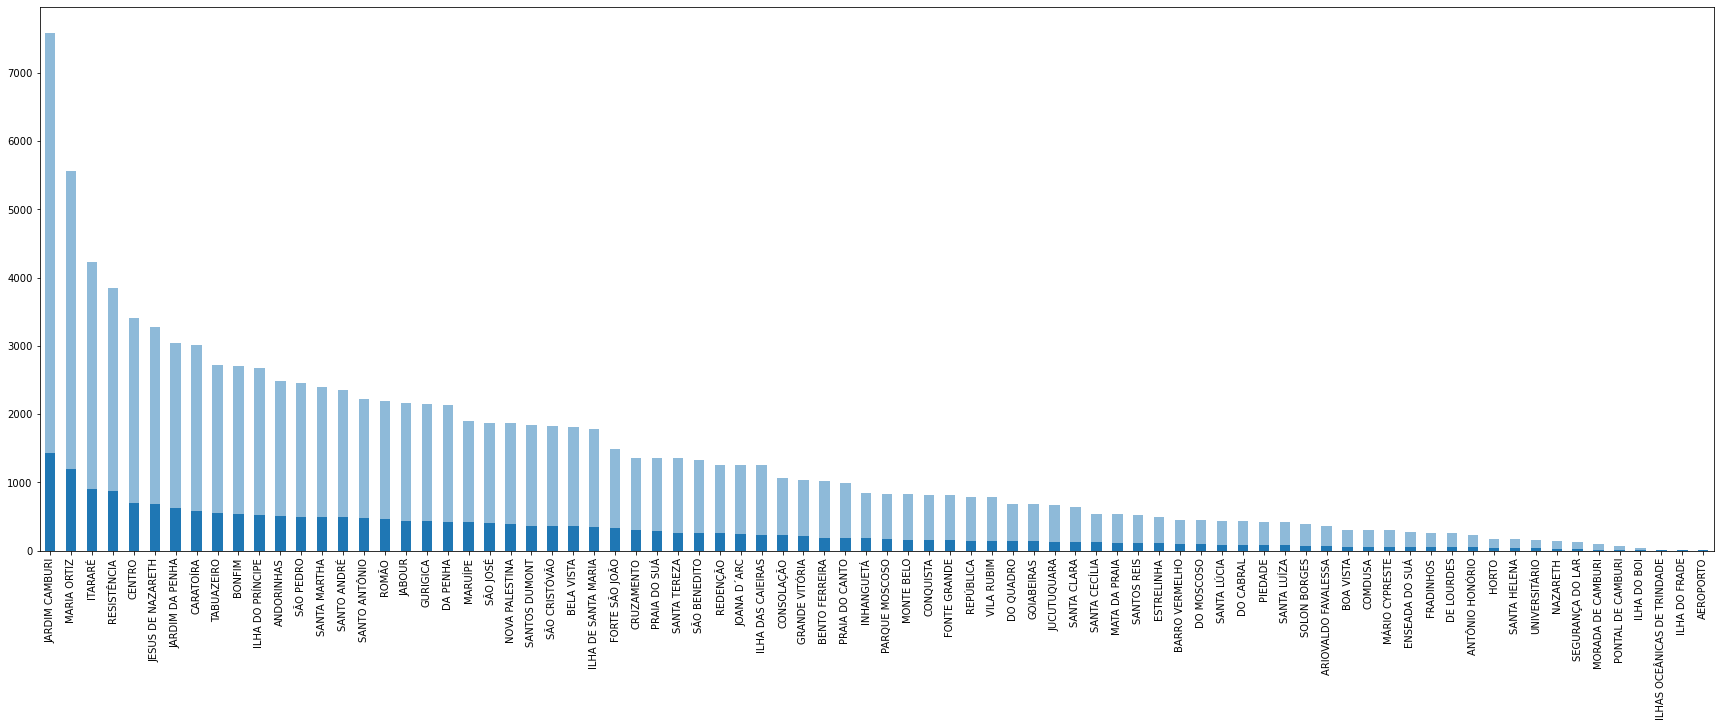

In [16]:
df['Neighbourhood'].value_counts().plot(kind='bar',alpha=0.5,figsize=(30,10))
disease_no_show(df)['Neighbourhood'].value_counts().plot(kind='bar',figsize=(30,10));

### 4) messages not sent to the patient and attend the appointment   VS   messages not sent to the patient and attend the appointment 

###### we want know if SMS helps patients to attend the appointment .

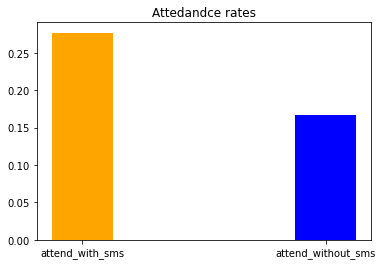

In [17]:
#patients attend by sms 
df_sms_1=df[df['SMS_received']==1]
attend_with_sms= df_sms_1['No-show'].value_counts()[1] / df_sms_1.shape[0]
#patients attend without sms
df_sms_0=df[df['SMS_received']==0]
attend_without_sms= df_sms_0['No-show'].value_counts()[1] / df_sms_0.shape[0]
y=[attend_with_sms,attend_without_sms]
x=['attend_with_sms','attend_without_sms']
plt.bar(x,y,width=.25,color=['orange','blue'])
plt.title('Attedandce rates');

###### and as I expected , the ratio who received an SMS  and attended is higher than the patients who did not receive an SMS

### 5) number of patients who booked an appointment attended or no

No     85307
Yes    21680
Name: No-show, dtype: int64


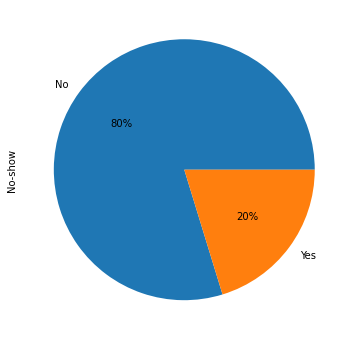

In [19]:
print(df['No-show'].value_counts())
df['No-show'].value_counts().plot(kind='pie',autopct='%1.f%%',figsize=(6,6));

###### it help us to know  percentage of  patient and make us clearly think about data  
###### this pie chart shows that the percentage of non attendance is much greater than percentage of  attendance , and this make us wonder about the reasons that led to the increase in the perecentage of non attendance in a noticeable way 

### 6) Do you attend the appointment depend on types of disease Hipertension,Diabetes,Alcoholism,Handcap ? 

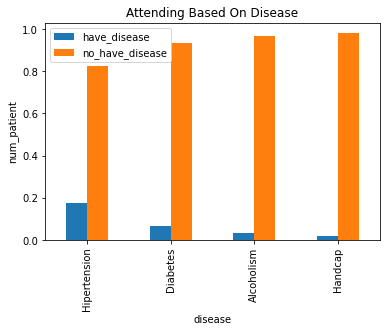

In [20]:
#patient who attend the appointment depend on types of disease  
x=(disease_no_show(df)['Hipertension']==1).mean()
y=(disease_no_show(df)['Diabetes']==1).mean()
z=(disease_no_show(df)['Alcoholism']==1).mean()
j=(disease_no_show(df)['Handcap']==1).mean()
have_disease=[x,y,z,j]
#patient who attend the appointment independ on types of disease
a=(disease_no_show(df)['Hipertension']==0).mean()
b=(disease_no_show(df)['Diabetes']==0).mean()
c=(disease_no_show(df)['Alcoholism']==0).mean()
d=(disease_no_show(df)['Handcap']==0).mean()
no_have_disease=[a,b,c,d]

dic={
    'have_disease':have_disease,
    'no_have_disease':no_have_disease
}
index=['Hipertension','Diabetes','Alcoholism','Handcap']

bar_data_frame=pd.DataFrame(dic,index=index).plot(kind='bar')
plt.xlabel('disease')
plt.ylabel('num_patient')
plt.title('Attending Based On Disease');

###### it is know that the presence of a certain disease in the patient leads to attending the appointment such as Diabetes and Hipertension ,but not always.
###### thare are diseases such as Alcoholism that do not bother to attend the appointment 

### 7)number of male and female

F    70118
M    36869
Name: Gender, dtype: int64


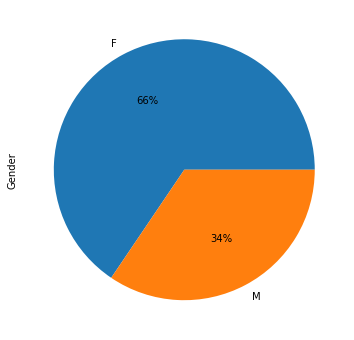

In [21]:
print(df['Gender'].value_counts())
df['Gender'].value_counts().plot(kind='pie',autopct='%1.f%%',figsize=(6,6));

###### it is clear to say that women takes way more care of they health in comparison to men

### 8) Age of patient

###### we want to know the distribution of age to men and women 

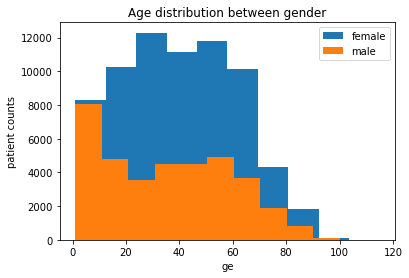

In [22]:
#age of women
df[df['Gender']=='F']['Age'].plot(kind='hist' , label='female')
#age of men
df[df['Gender']=='M']['Age'].plot(kind='hist',label='male')
plt.legend()
plt.xlabel('ge')
plt.ylabel('patient counts')
plt.title('Age distribution between gender');

###### the age of men appear to be the same as that of women

### 9) which day of the week has the most precentage of appointments ?

###### it is possible that the days affect the attendance of appointment,so I made line chart of days of the appointment and another drowing of the days of attending the appointments 

In [23]:
#summerize Day Of Appointment 
x=df.groupby('DayOfAppointment')['PatientId'].count()
#summerize Day Of Appointment that patient attended 
y=disease_no_show(df).groupby('DayOfAppointment')['PatientId'].count()

plt.plot(x.index,x.values,marker='o',label='Not Attend')
plt.plot(y.index,y.values,marker='o',label='Attend')
plt.title('day of appointment')
plt.xlabel('days')
plt.ylabel('num_patient')
plt.legend()
plt.grid();

KeyError: 'DayOfAppointment'

###### obvouisly , it gets crowded on tuesday and wednesday but not in saturday

### 10) Age of patients show and no show appointment

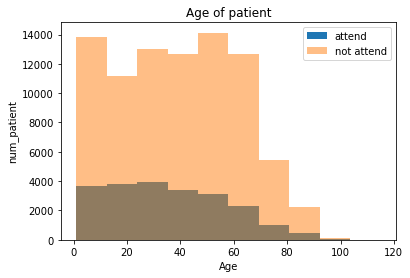

In [24]:
#age of patient attend the appointment 
disease_no_show(df)['Age'].plot(kind='hist',label='attend')
#age of patient not attend the appointment
disease_show(df)['Age'].plot(kind='hist',alpha=0.5,label='not attend')
plt.xlabel('Age')
plt.ylabel('num_patient')
plt.title('Age of patient')
plt.legend();

###### Age seems to be an important factor to know in order to predict if a patient will show up for their scheduled appointment where middle-aged patients seem less prone not to show up

# conclusion
 
###### 1-  Woman takes way more care of they health in comparison to man.
###### 2- Hypertension is factor for higher attendance frequency.
###### 3- Patient append the appointment by SMS received is higher than SMS un-received .
###### 4- Hypertension and diabetes are strong features that affect showing up of the patient.
###### 5- Alcoholism seems to be an important factor where alcoholic patients seem not to tend to show for the appointment more than non-alcoholic ones, which is a special case where suffering from an illness is actually positevely correlated with not showing up unlike other illnesses and disabilities which negatively correlates
###### 6- Saturday may be holiday because did not have any appointment .
######  7- The number of days between the day the patient called or registered the appointment and the day of the actual appointment seem to be an important factor where a low number of days seems to be associated with a lower chance of not showing for the appointment
###### 8- Handicap column has five different values(0,1,2,3,4) after alot of research I figured out that 1 to 4 is handicapped with difference precentage of the handicap, so I converted (1,2,3,4) to 1 that means handicap and 0 not handicapped.
## limitation
###### 1- the project being limited to exploratory data analysis (the absence of machine learning). I could have extracted a lot of human-understandable insights from machine learning models and gained a lot more knowledge in regards to the importance of the variables in relation to the target variable, which would limit any wrong deduction of a cause-and-effect relationship that may happen.
###### 2- distance between the hospital and destination, insurance situation, education level would be helpful for better analysis
###### 3- data collected between 29/4/2016 and 6/6/2016. If data had been collected over a period of more than one year, it would better reflect time-dependent changes
###### 4- doctor's specialty may also be correlated with missed appointment